In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score
import torch.optim as optim
from torch.utils.data import IterableDataset, DataLoader
import torch.nn as nn
import argparse

In [2]:
df_results = pd.read_csv("rnn_type_nets_results.csv")

In [3]:
df_results

,F1_macro,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type
0,0.7241,1024,0.5,64,0.0010,2,adam,log,"tcp_udp_ratio_bytes,dir_ratio_bytes,avg_durati...",RNN
1,0.3122,256,0.0,1024,0.0100,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",RNN
2,0.3122,512,0.0,1024,0.0100,1,adam,log,"n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes...",RNN
3,0.6376,512,0.0,64,0.0001,3,adam,z_score,"n_flows,n_packets,n_bytes",GRU
4,0.6075,1024,0.0,512,0.0010,1,adam,z_score,"n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes...",RNN
...,...,...,...,...,...,...,...,...,...,...
9616,0.3122,256,0.2,256,0.0100,1,adam,log,"n_flows,n_packets,n_bytes",RNN
9617,0.7763,256,0.5,1024,0.0010,1,adam,log,"n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes...",GRU
9618,0.7564,1024,0.0,128,0.0001,3,adam,z_score,"tcp_udp_ratio_bytes,dir_ratio_bytes,avg_durati...",GRU
9619,0.7161,1024,0.0,64,0.0001,3,adam,log,"n_flows,n_packets,n_bytes",RNN


## Top 10 models

In [4]:
df_results = df_results.sort_values(by='F1_macro',ascending = False)

In [5]:
df_results.head(10)

,F1_macro,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type
6251,0.8359,1024,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
535,0.8356,256,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
4220,0.8353,512,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
3879,0.8345,512,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
8103,0.8335,256,0.2,64,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
9294,0.8331,256,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
6873,0.8328,1024,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
4103,0.8317,256,0.5,128,0.001,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
8143,0.8312,256,0.2,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM
3921,0.8311,512,0.5,128,0.001,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM


In [6]:
print(df_results.groupby('type')['F1_macro'].max())

type
GRU     0.8296
LSTM    0.8359
RNN     0.8049
Name: F1_macro, dtype: float64


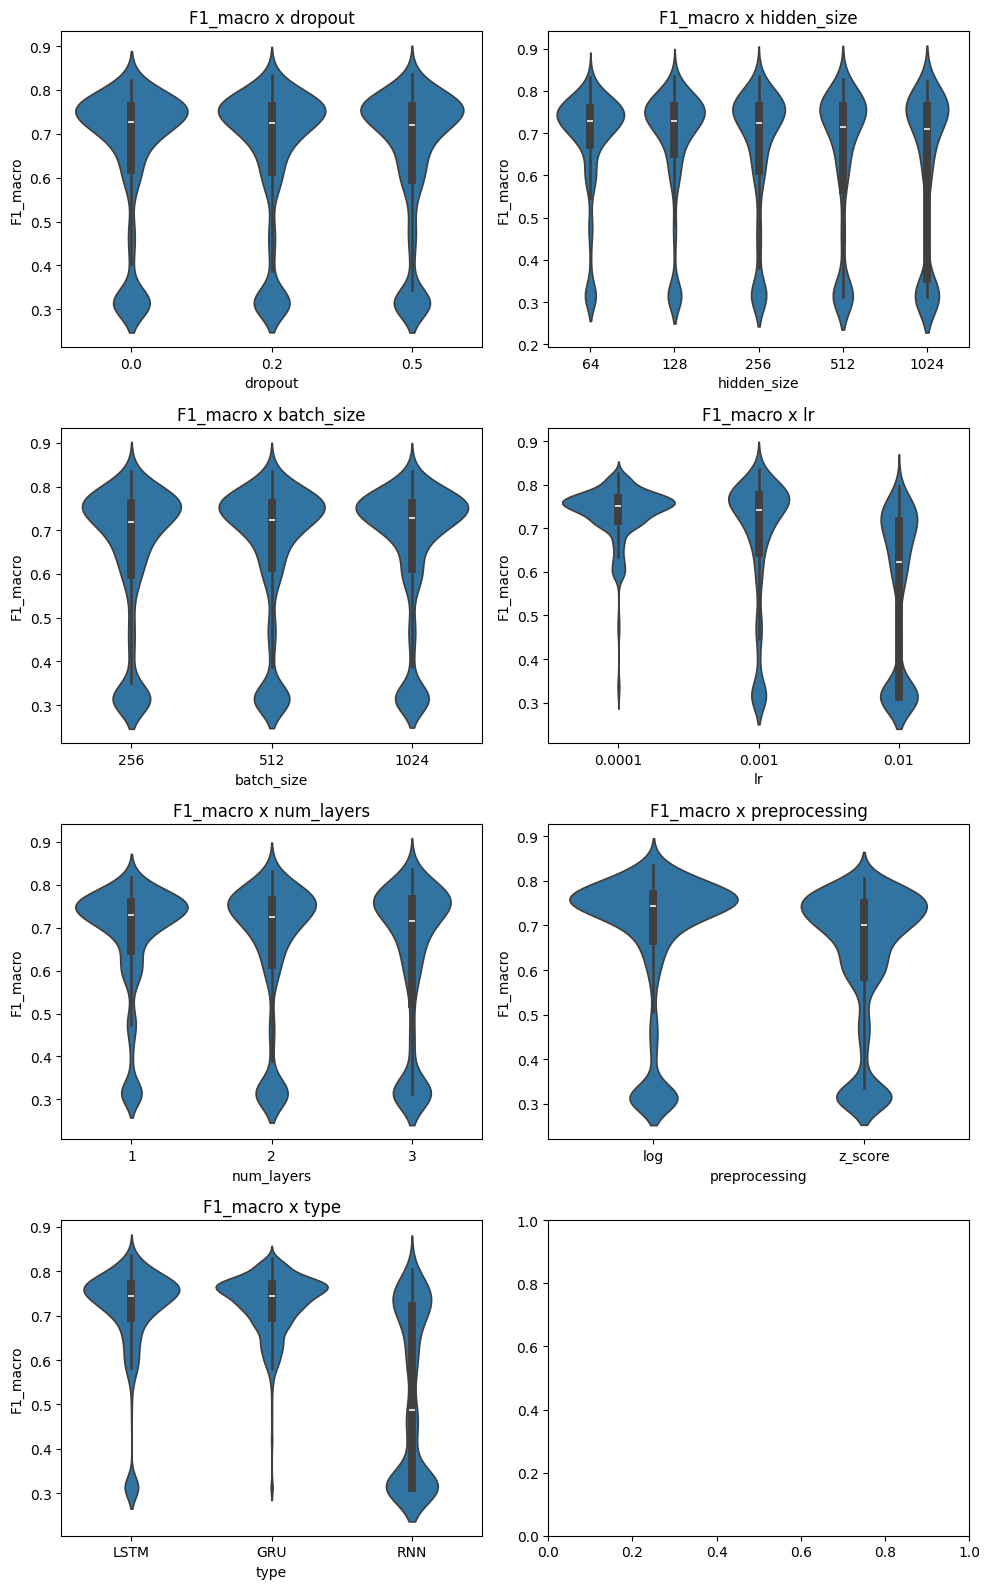

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(5*2, 4*4))
axes = axes.flatten()  # Flatten to make indexing easier

for idx, col in enumerate(['dropout', 'hidden_size','batch_size', 'lr', 'num_layers','preprocessing','type']):
    sns.violinplot(data=df_results, x=col, y='F1_macro', ax=axes[idx])
    axes[idx].set_title(f'{'F1_macro'} x {col}')


plt.tight_layout()
plt.show()

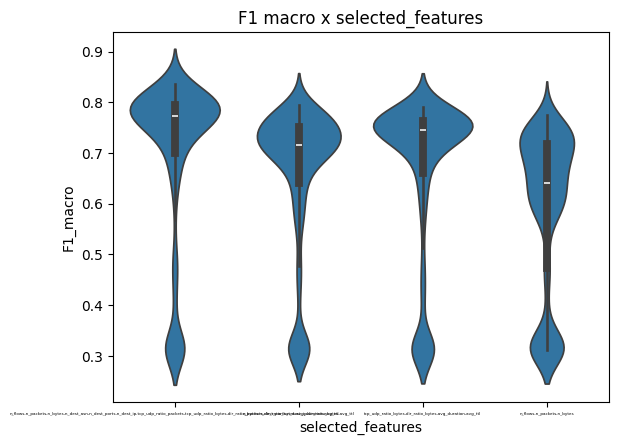

In [8]:
sns.violinplot(data=df_results, x='selected_features', y='F1_macro')
plt.title('F1 macro x selected_features')
plt.xticks(fontsize=3)
plt.show()

In [9]:
print(df_results.groupby('selected_features')['F1_macro'].max())

selected_features
n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl                                                                                                          0.7950
n_flows,n_packets,n_bytes                                                                                                                                       0.7740
n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl    0.8359
tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl                                                                                                        0.7903
Name: F1_macro, dtype: float64
